In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor as DTRegressor
from sklearn.ensemble import RandomForestRegressor as RFRegressor
from sklearn.ensemble import AdaBoostRegressor as Ada
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv('/content/T1.csv')
df.columns = ['date', 'active_power', 'wind_speed', 'theor_power', 'wind_dir']

df

,date,active_power,wind_speed,theor_power,wind_dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
13592,09 04 2018 21:30,470.964905,5.697875,527.764651,77.392159
13593,09 04 2018 21:40,530.612183,6.068895,647.476016,75.273537
13594,09 04 2018 21:50,323.759399,4.639940,252.222341,79.732201
13595,09 04 2018 22:00,16.629650,2.803021,0.000000,95.806267


In [ ]:
# Convert to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date column as index
df.set_index('date', inplace=True)

df

,active_power,wind_speed,theor_power,wind_dir
date,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-09-04 21:30:00,470.964905,5.697875,527.764651,77.392159
2018-09-04 21:40:00,530.612183,6.068895,647.476016,75.273537
2018-09-04 21:50:00,323.759399,4.639940,252.222341,79.732201


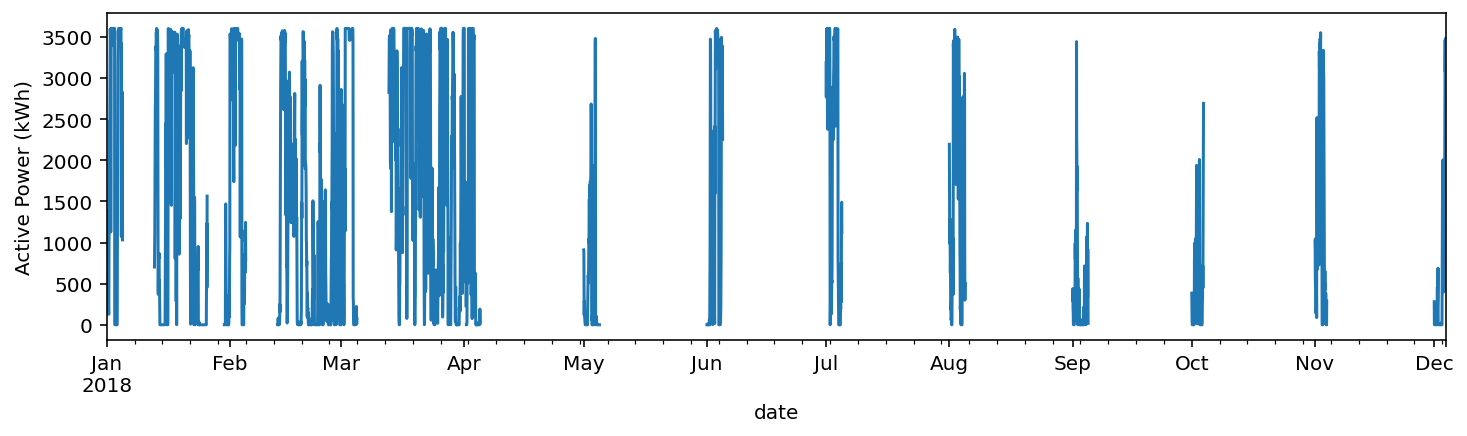

In [ ]:
# Resample hourly average power and plot
df.resample('H').mean().active_power.plot(figsize=(12,3), ylabel='Active Power (kWh)')

In [ ]:
# Get hours from datetime
dates = df.index
hours = [date.hour for date in dates]
df['hour'] = hours

df

,active_power,wind_speed,theor_power,wind_dir,hour
date,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0
...,...,...,...,...,...
2018-09-04 21:30:00,470.964905,5.697875,527.764651,77.392159,21
2018-09-04 21:40:00,530.612183,6.068895,647.476016,75.273537,21
2018-09-04 21:50:00,323.759399,4.639940,252.222341,79.732201,21


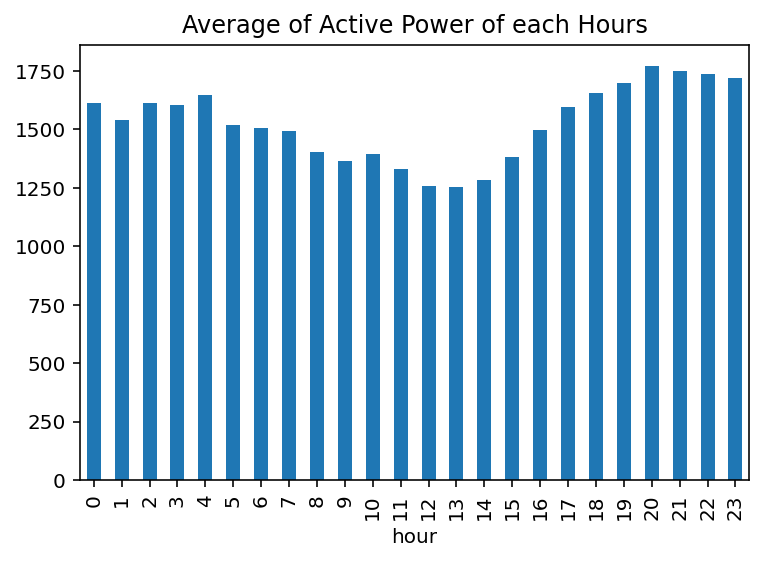

In [ ]:
df.groupby('hour').mean().active_power.plot(kind='bar', title='Average of Active Power of each Hours')

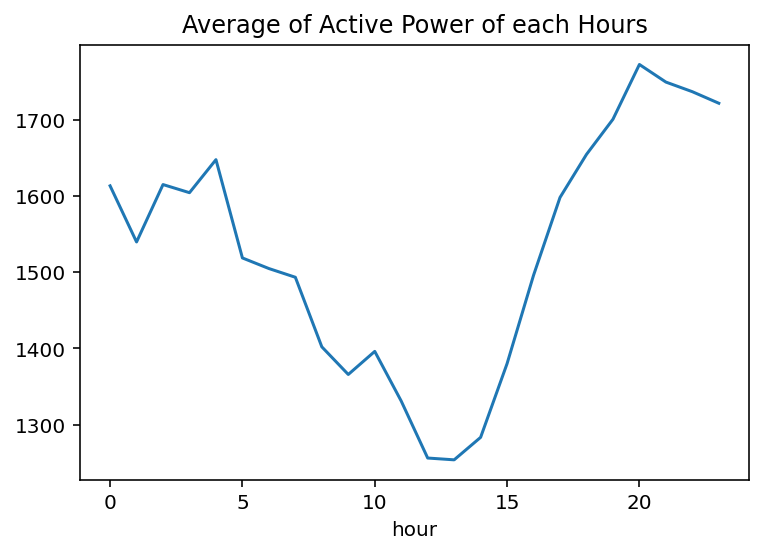

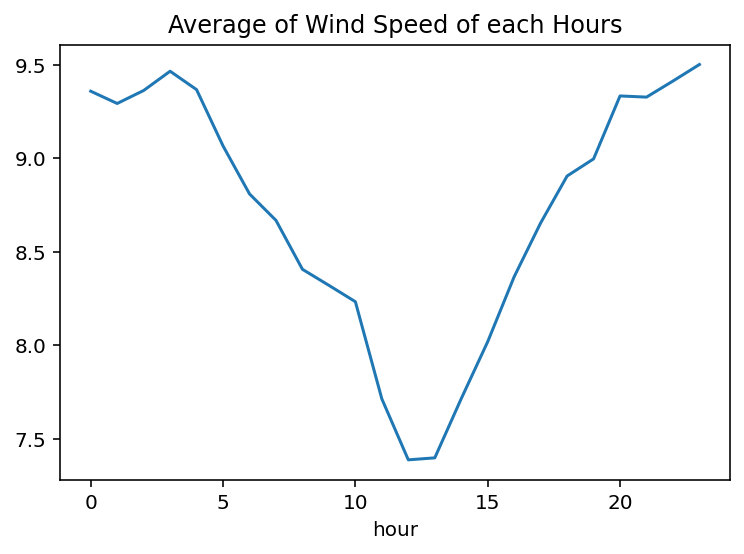

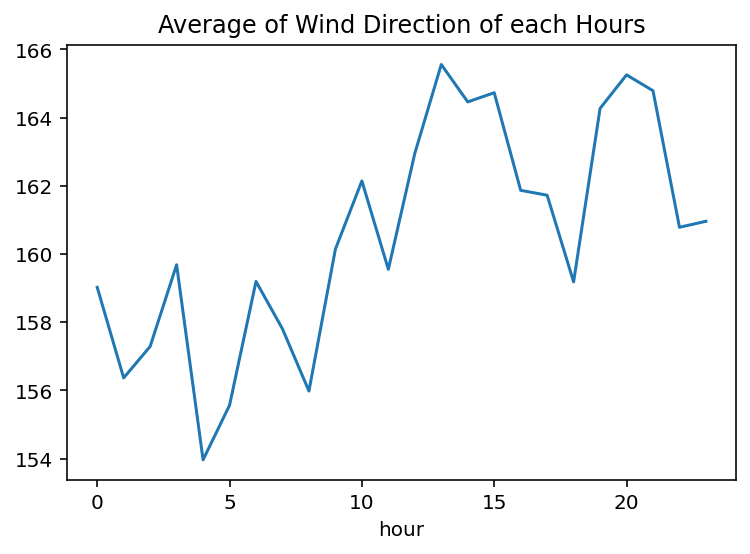

In [ ]:
df.groupby('hour').mean().active_power.plot(title='Average of Active Power of each Hours')
plt.show()

df.groupby('hour').mean().wind_speed.plot(title='Average of Wind Speed of each Hours')
plt.show()

df.groupby('hour').mean().wind_dir.plot(title='Average of Wind Direction of each Hours')
plt.show()

In [ ]:
# Get hours from datetime
dates = df.index
months = [date.month for date in dates]
df['month'] = months

df

,active_power,wind_speed,theor_power,wind_dir,hour,month
date,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1
...,...,...,...,...,...,...
2018-09-04 21:30:00,470.964905,5.697875,527.764651,77.392159,21,9
2018-09-04 21:40:00,530.612183,6.068895,647.476016,75.273537,21,9
2018-09-04 21:50:00,323.759399,4.639940,252.222341,79.732201,21,9


In [ ]:
color = list(np.full(12, 'grey'))
color[2] = 'orange'
color

['grey',
 'grey',
 'orange',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey']

Text(0, 0.5, 'Active Power [kW]')

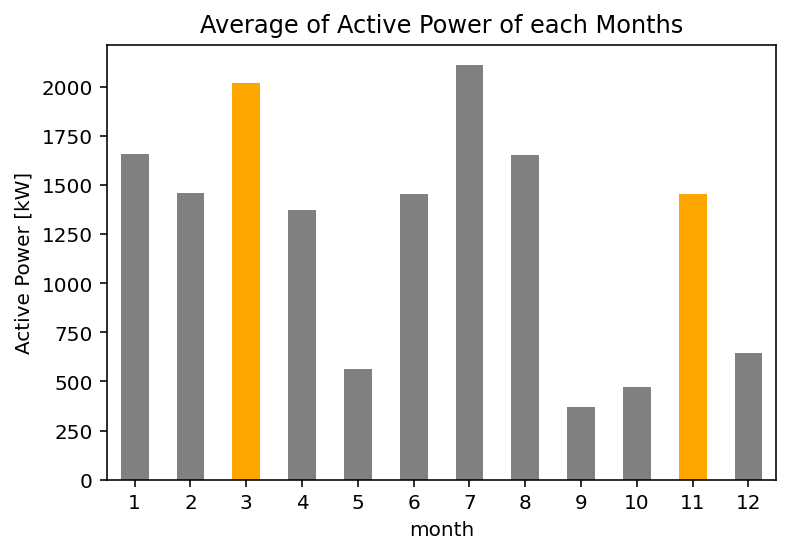

In [ ]:
color = list(np.full(12, 'grey'))
color[2], color[10] = 'orange', 'orange'

df.groupby('month').mean().active_power.plot(kind='bar', title='Average of Active Power of each Months', color=color, rot=0)
plt.ylabel('Active Power [kW]')

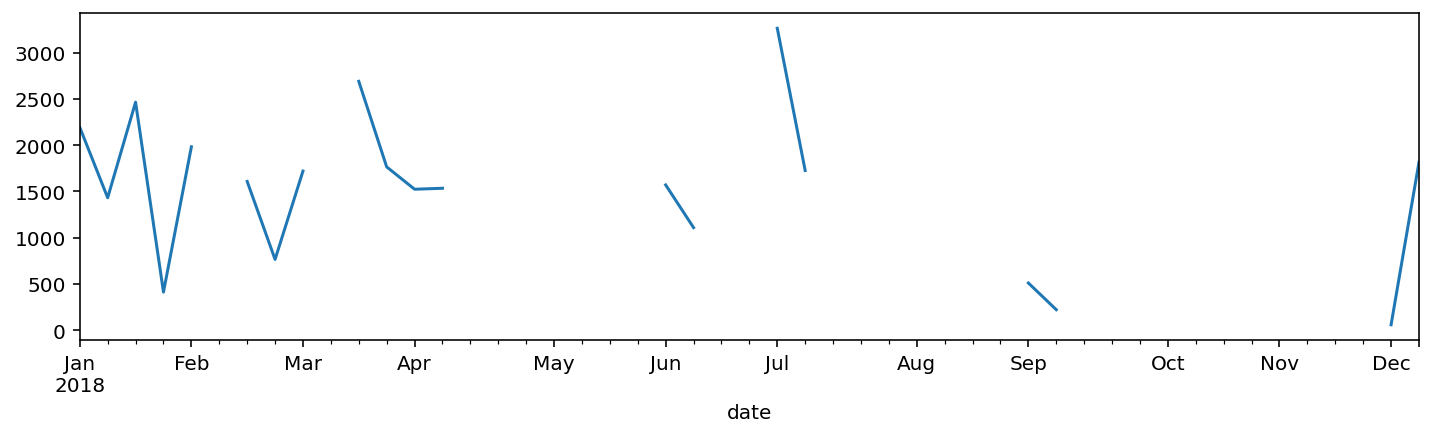

In [16]:
# Resample weekly average power and plot
df.resample('W').mean().active_power.plot(figsize=(12,3))

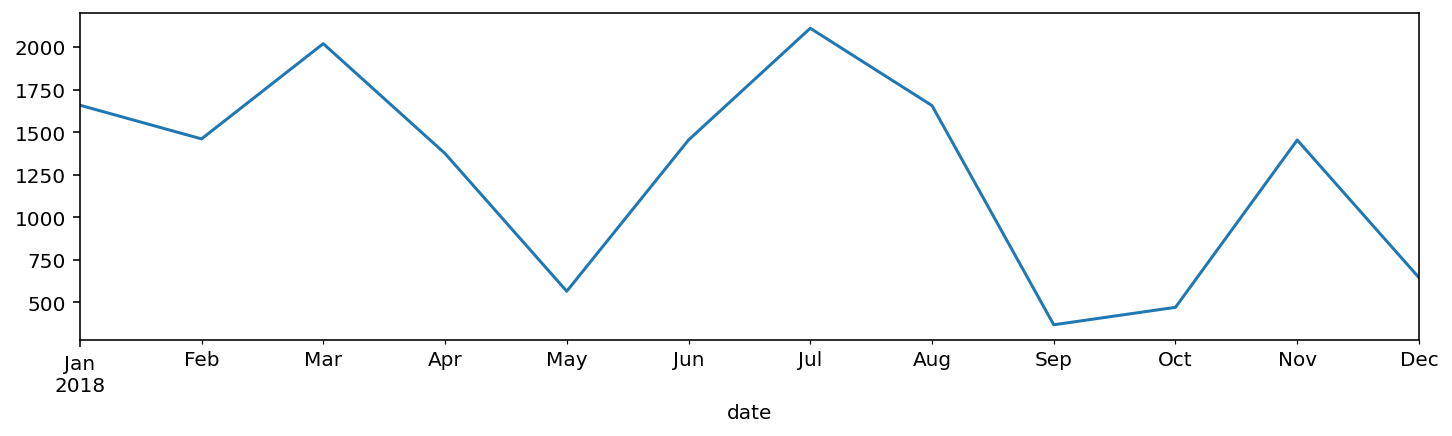

In [ ]:
# Resample monthly average power and plot
df.resample('M').mean().active_power.plot(figsize=(12,3))

In [17]:
# Calculate power loss
df['loss'] = df['theor_power'] - df['active_power']

df

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss
date,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276
...,...,...,...,...,...,...,...
2018-09-04 21:30:00,470.964905,5.697875,527.764651,77.392159,21,9,56.799746
2018-09-04 21:40:00,530.612183,6.068895,647.476016,75.273537,21,9,116.863833
2018-09-04 21:50:00,323.759399,4.639940,252.222341,79.732201,21,9,-71.537058


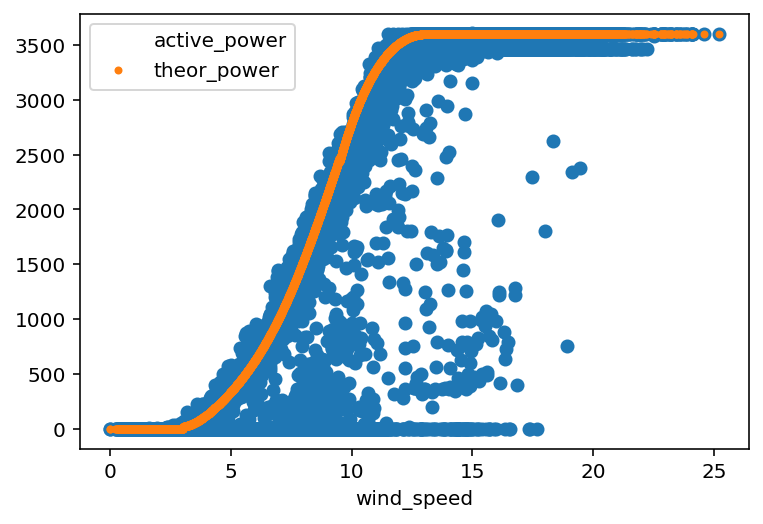

In [18]:
#Wind power curve analysis
ax = df.plot(x='wind_speed', y='active_power', style='o')
df.plot(x='wind_speed', y='theor_power', style='.', ax=ax)

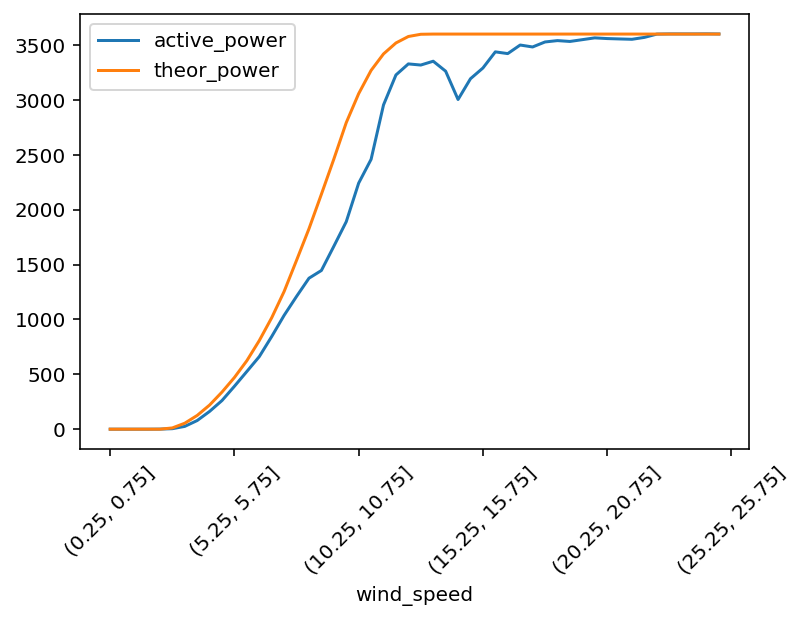

In [19]:
interval = np.arange(0.25,26,0.5)
df.groupby(pd.cut(df['wind_speed'], interval)).mean().head(10)
df.groupby(pd.cut(df['wind_speed'], interval)).mean().plot(y=['active_power', 'theor_power'], rot=45)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Mean Power Curve')

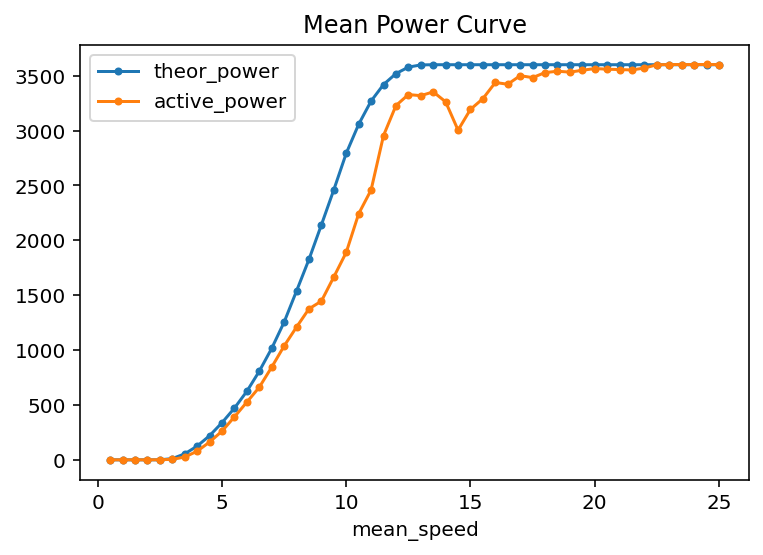

In [20]:
def mean_power_curve(df):
    # Group by wind speed
    groups = df.groupby(pd.cut(df['wind_speed'], interval))

    mean_speed = []
    for key, item in groups:
        # Get keys from groupby method
        c = np.str(key)
        string = c[1:-1]
        string = string.split(', ')
        bounds = [float(i) for i in string]
        mean = np.mean(bounds)
        mean_speed.append(mean)

    # Take average of grouped df
    df_mean_speed = groups.mean()

    # Add mean speed to dataframe
    df_mean_speed['mean_speed'] = mean_speed

    # Plot
    df_mean_speed.plot(x='mean_speed', y=['theor_power', 'active_power'], style='.-')
mean_power_curve(df)
plt.title('Mean Power Curve')
# plt.xlim(0,5)

In [21]:
#We would like to investigate Mean Power Curve plot for all directions.

# create a function for a categorical column 
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'
df['direction'] = df['wind_dir'].apply(direction)

df

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-09-04 21:30:00,470.964905,5.697875,527.764651,77.392159,21,9,56.799746,ENE
2018-09-04 21:40:00,530.612183,6.068895,647.476016,75.273537,21,9,116.863833,ENE
2018-09-04 21:50:00,323.759399,4.639940,252.222341,79.732201,21,9,-71.537058,E


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`

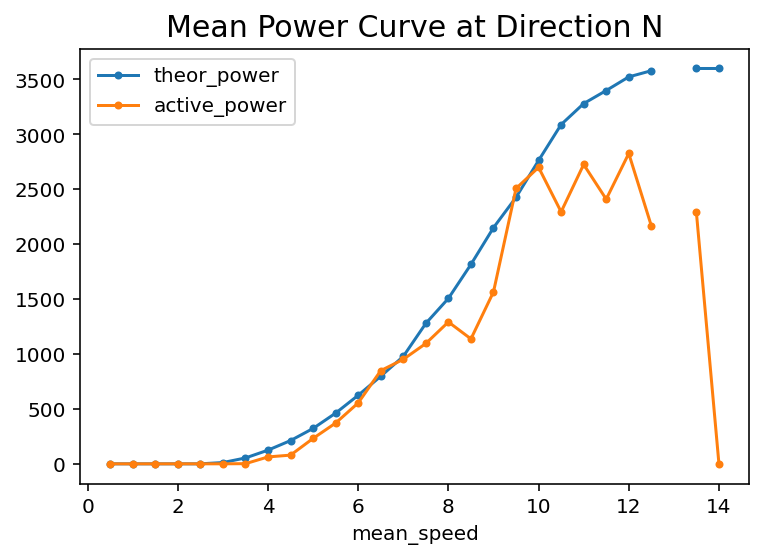

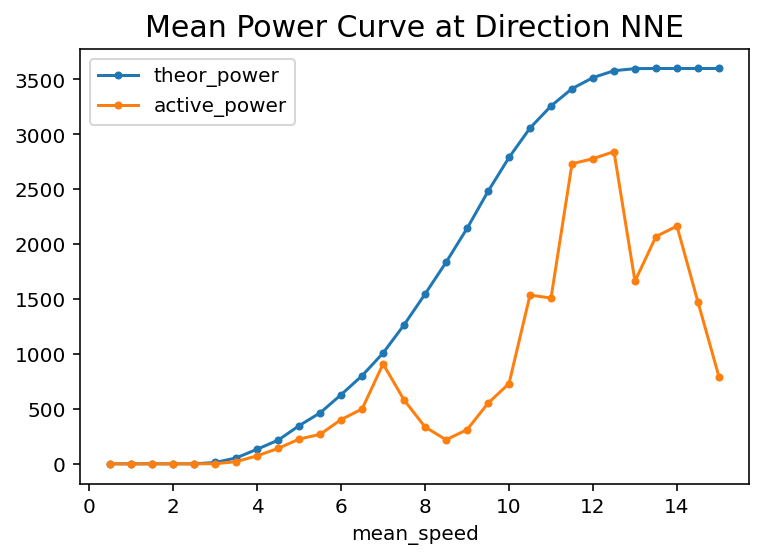

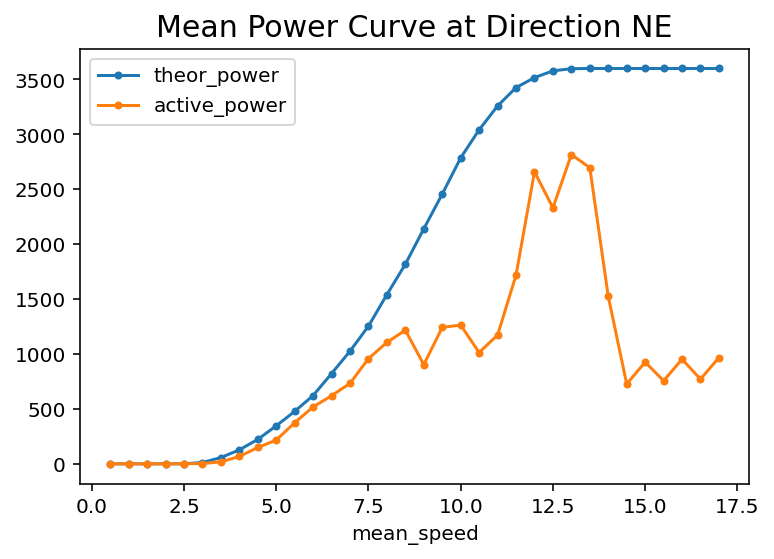

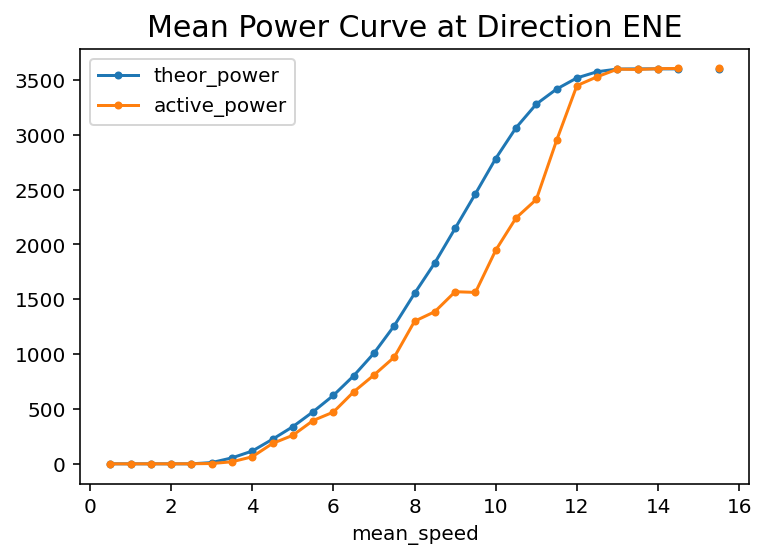

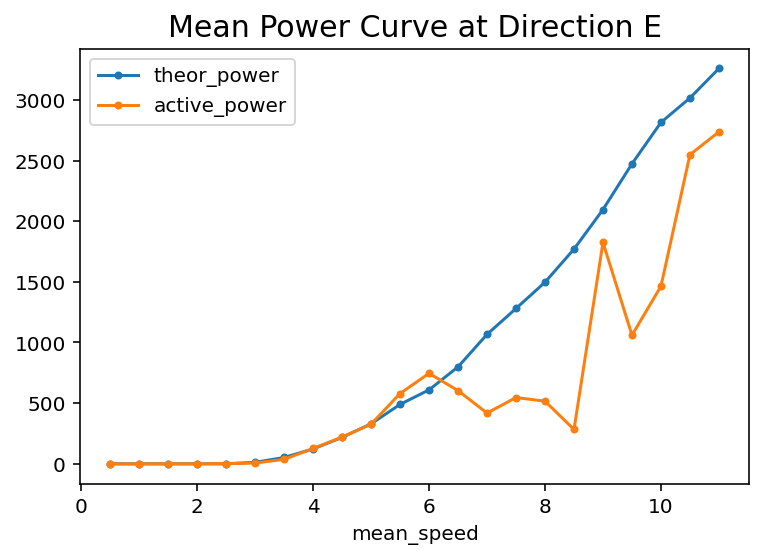

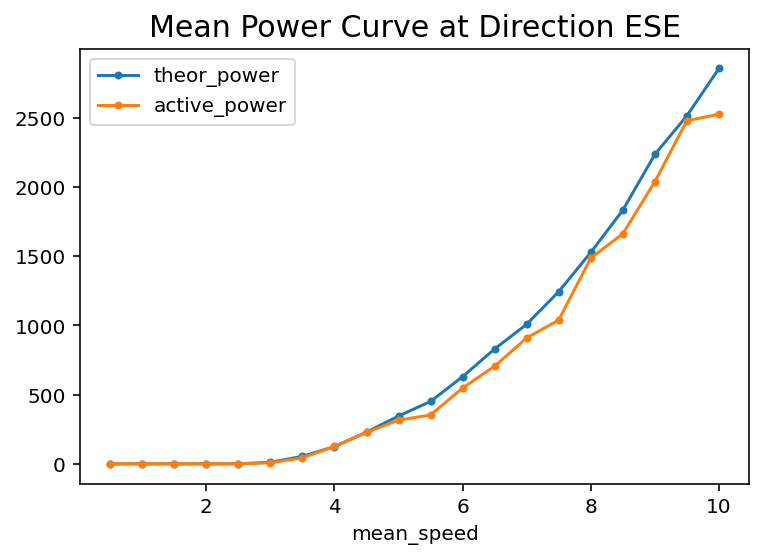

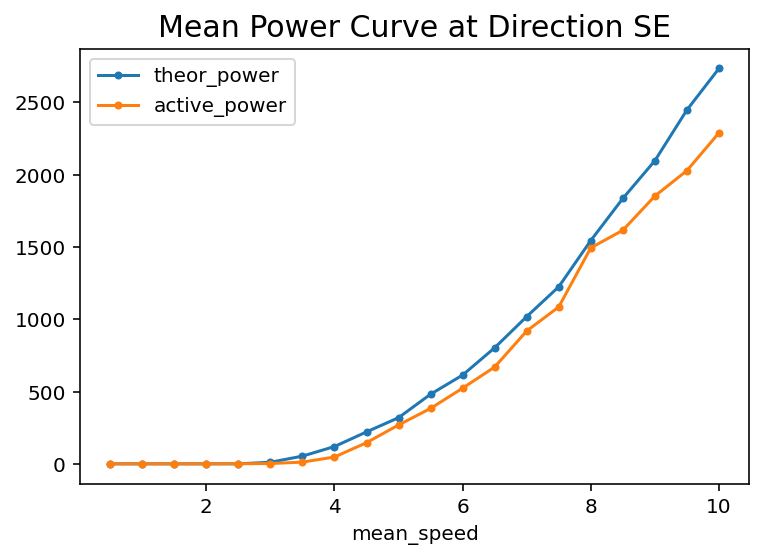

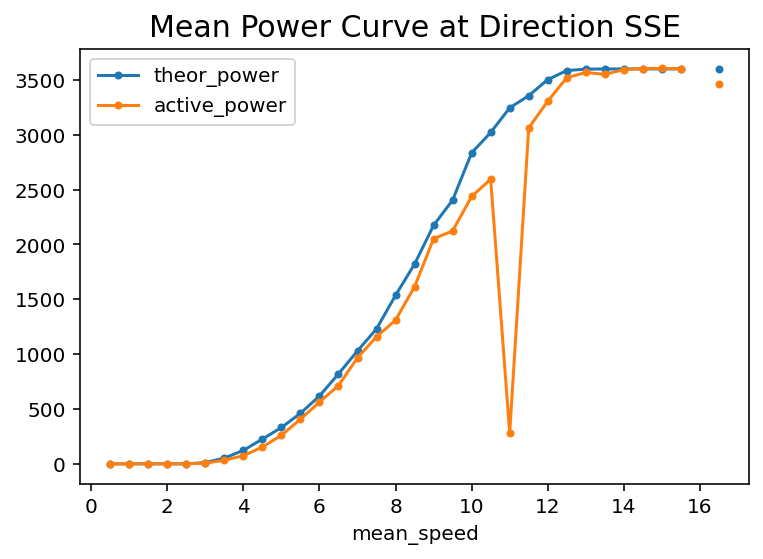

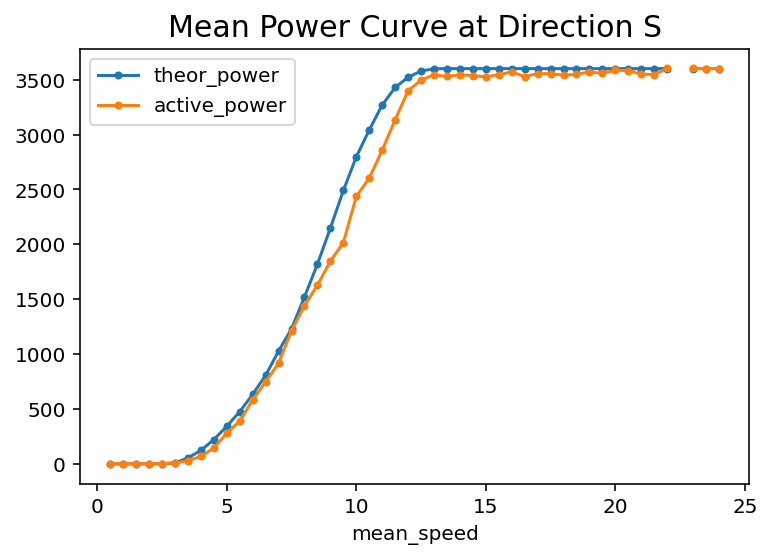

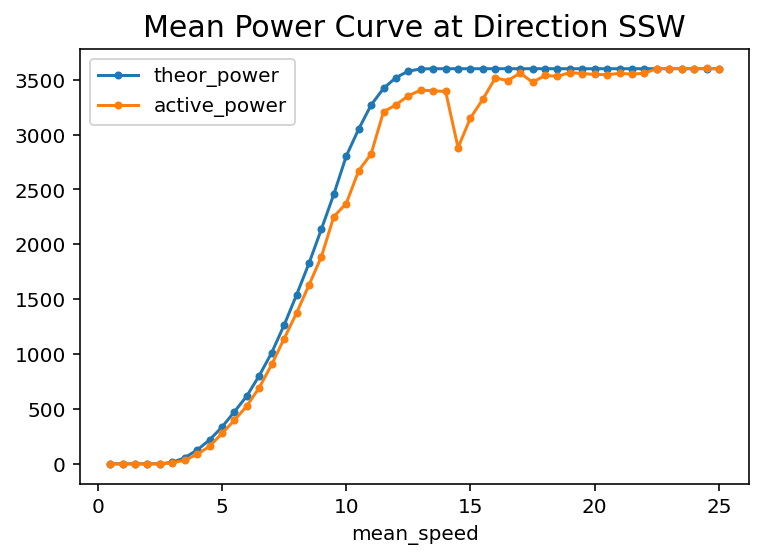

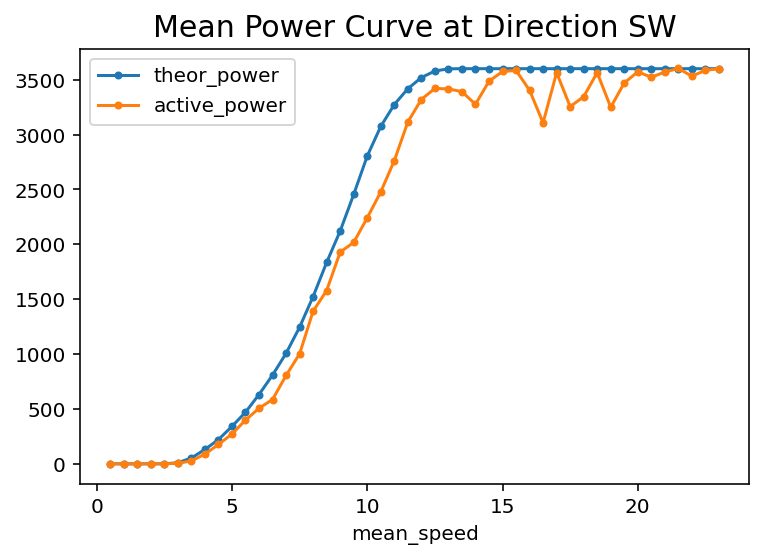

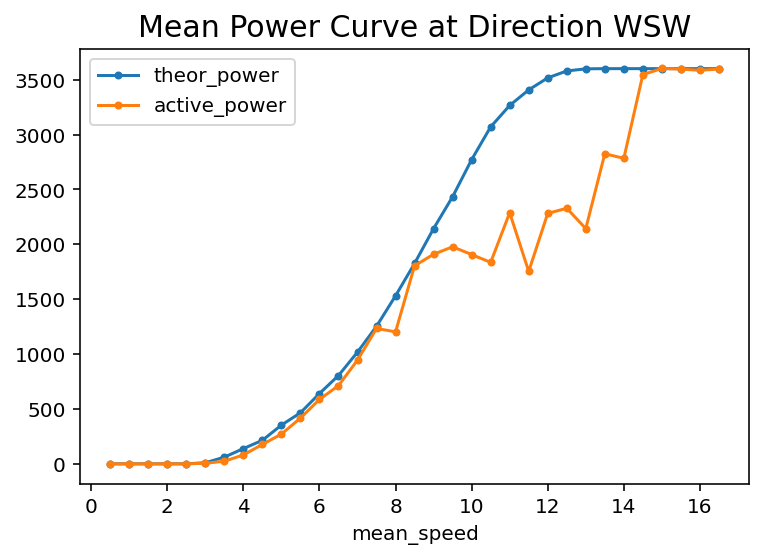

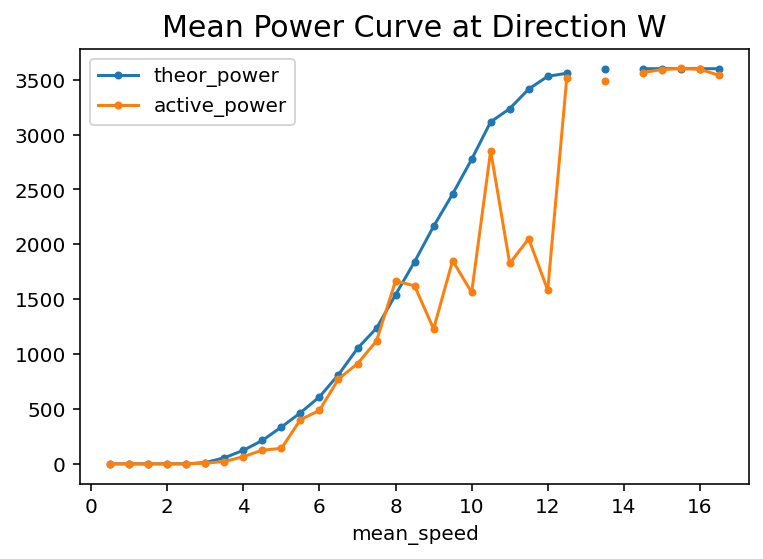

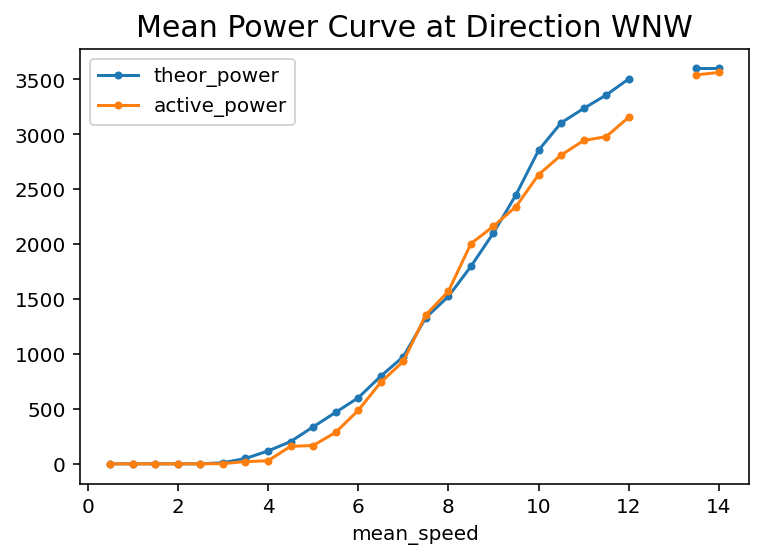

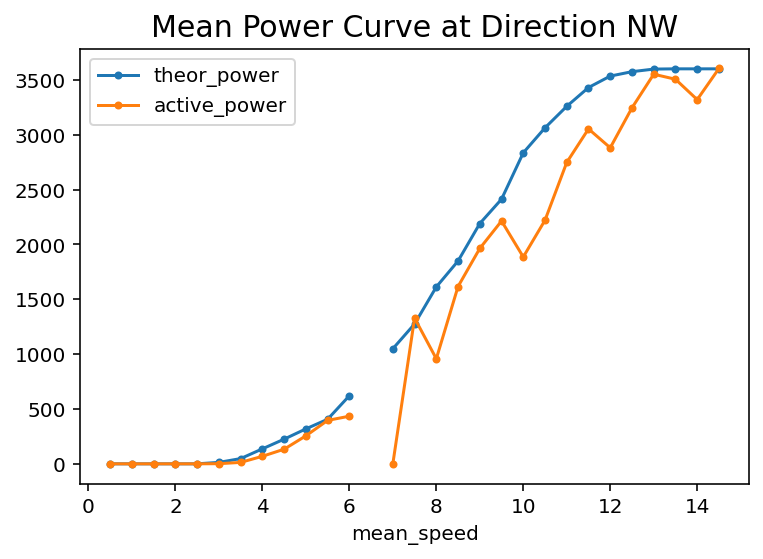

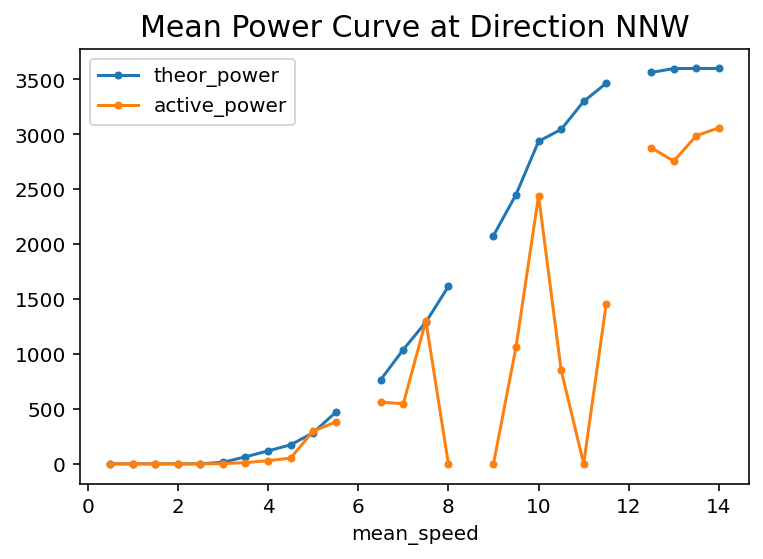

In [22]:
directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

for d in directions:
    # Dataframe from one direction
    df_d = df[df.direction==d]
    # Plot mean power curve
    mean_power_curve(df_d)
    plt.title(f'Mean Power Curve at Direction {d}', size=15)
#     plt.xlim(0,5)

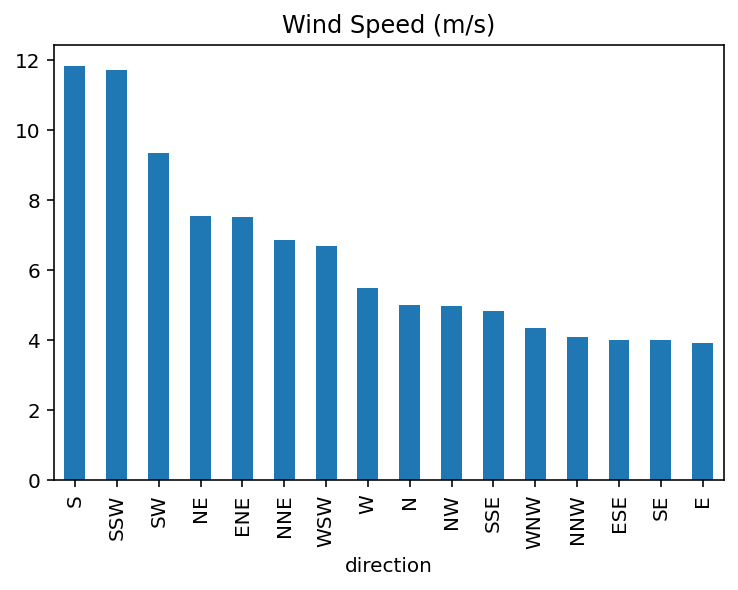

In [23]:
df.groupby('direction').wind_speed.mean().sort_values(ascending=False).plot(kind='bar', title='Wind Speed (m/s)')

In [24]:
#Data cleansing, EDA
df2 = df.copy()

# Remove negative active power
df_outlier_removed = df2[df2.active_power>0]

df_outlier_removed

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-09-04 21:30:00,470.964905,5.697875,527.764651,77.392159,21,9,56.799746,ENE
2018-09-04 21:40:00,530.612183,6.068895,647.476016,75.273537,21,9,116.863833,ENE
2018-09-04 21:50:00,323.759399,4.639940,252.222341,79.732201,21,9,-71.537058,E


In [25]:
#Outliers
# When wind speed is below 3.5, there is still power
df_outlier_removed[(df_outlier_removed.wind_speed<=3.5) & (df_outlier_removed.active_power!=0)]

,active_power,wind_speed,theor_power,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 12:30:00,41.947239,3.253968,29.286956,233.065903,12,1,-12.660283,SW
2018-03-01 15:30:00,7.347679,3.011371,16.374212,238.690598,15,3,9.026533,WSW
2018-03-01 15:50:00,12.344200,3.246252,28.731272,238.076508,15,3,16.387072,WSW
2018-05-01 07:30:00,13.934310,3.227394,27.413258,62.523109,7,5,13.478948,ENE
2018-05-01 08:10:00,22.780531,3.310203,33.624574,74.864113,8,5,10.844043,ENE
...,...,...,...,...,...,...,...,...
2018-09-04 10:00:00,4.255192,2.525317,0.000000,71.862793,10,9,-4.255192,ENE
2018-09-04 10:20:00,6.633533,3.474530,49.199256,72.455566,10,9,42.565723,ENE
2018-09-04 11:40:00,0.219534,2.338070,0.000000,103.965797,11,9,-0.219534,ESE


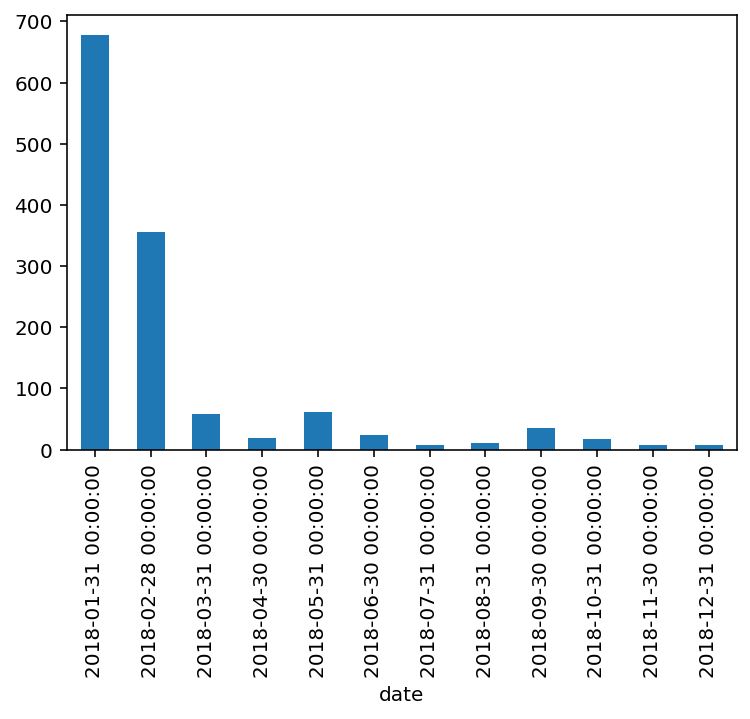

In [26]:
df_zero_power = df[(df.active_power==0) & (df.theor_power!=0) & (df.wind_speed>3.5)]

# Plot the frequency (counts) of ZERO power of every month
df_zero_power.resample('M').count().active_power.plot(kind='bar')

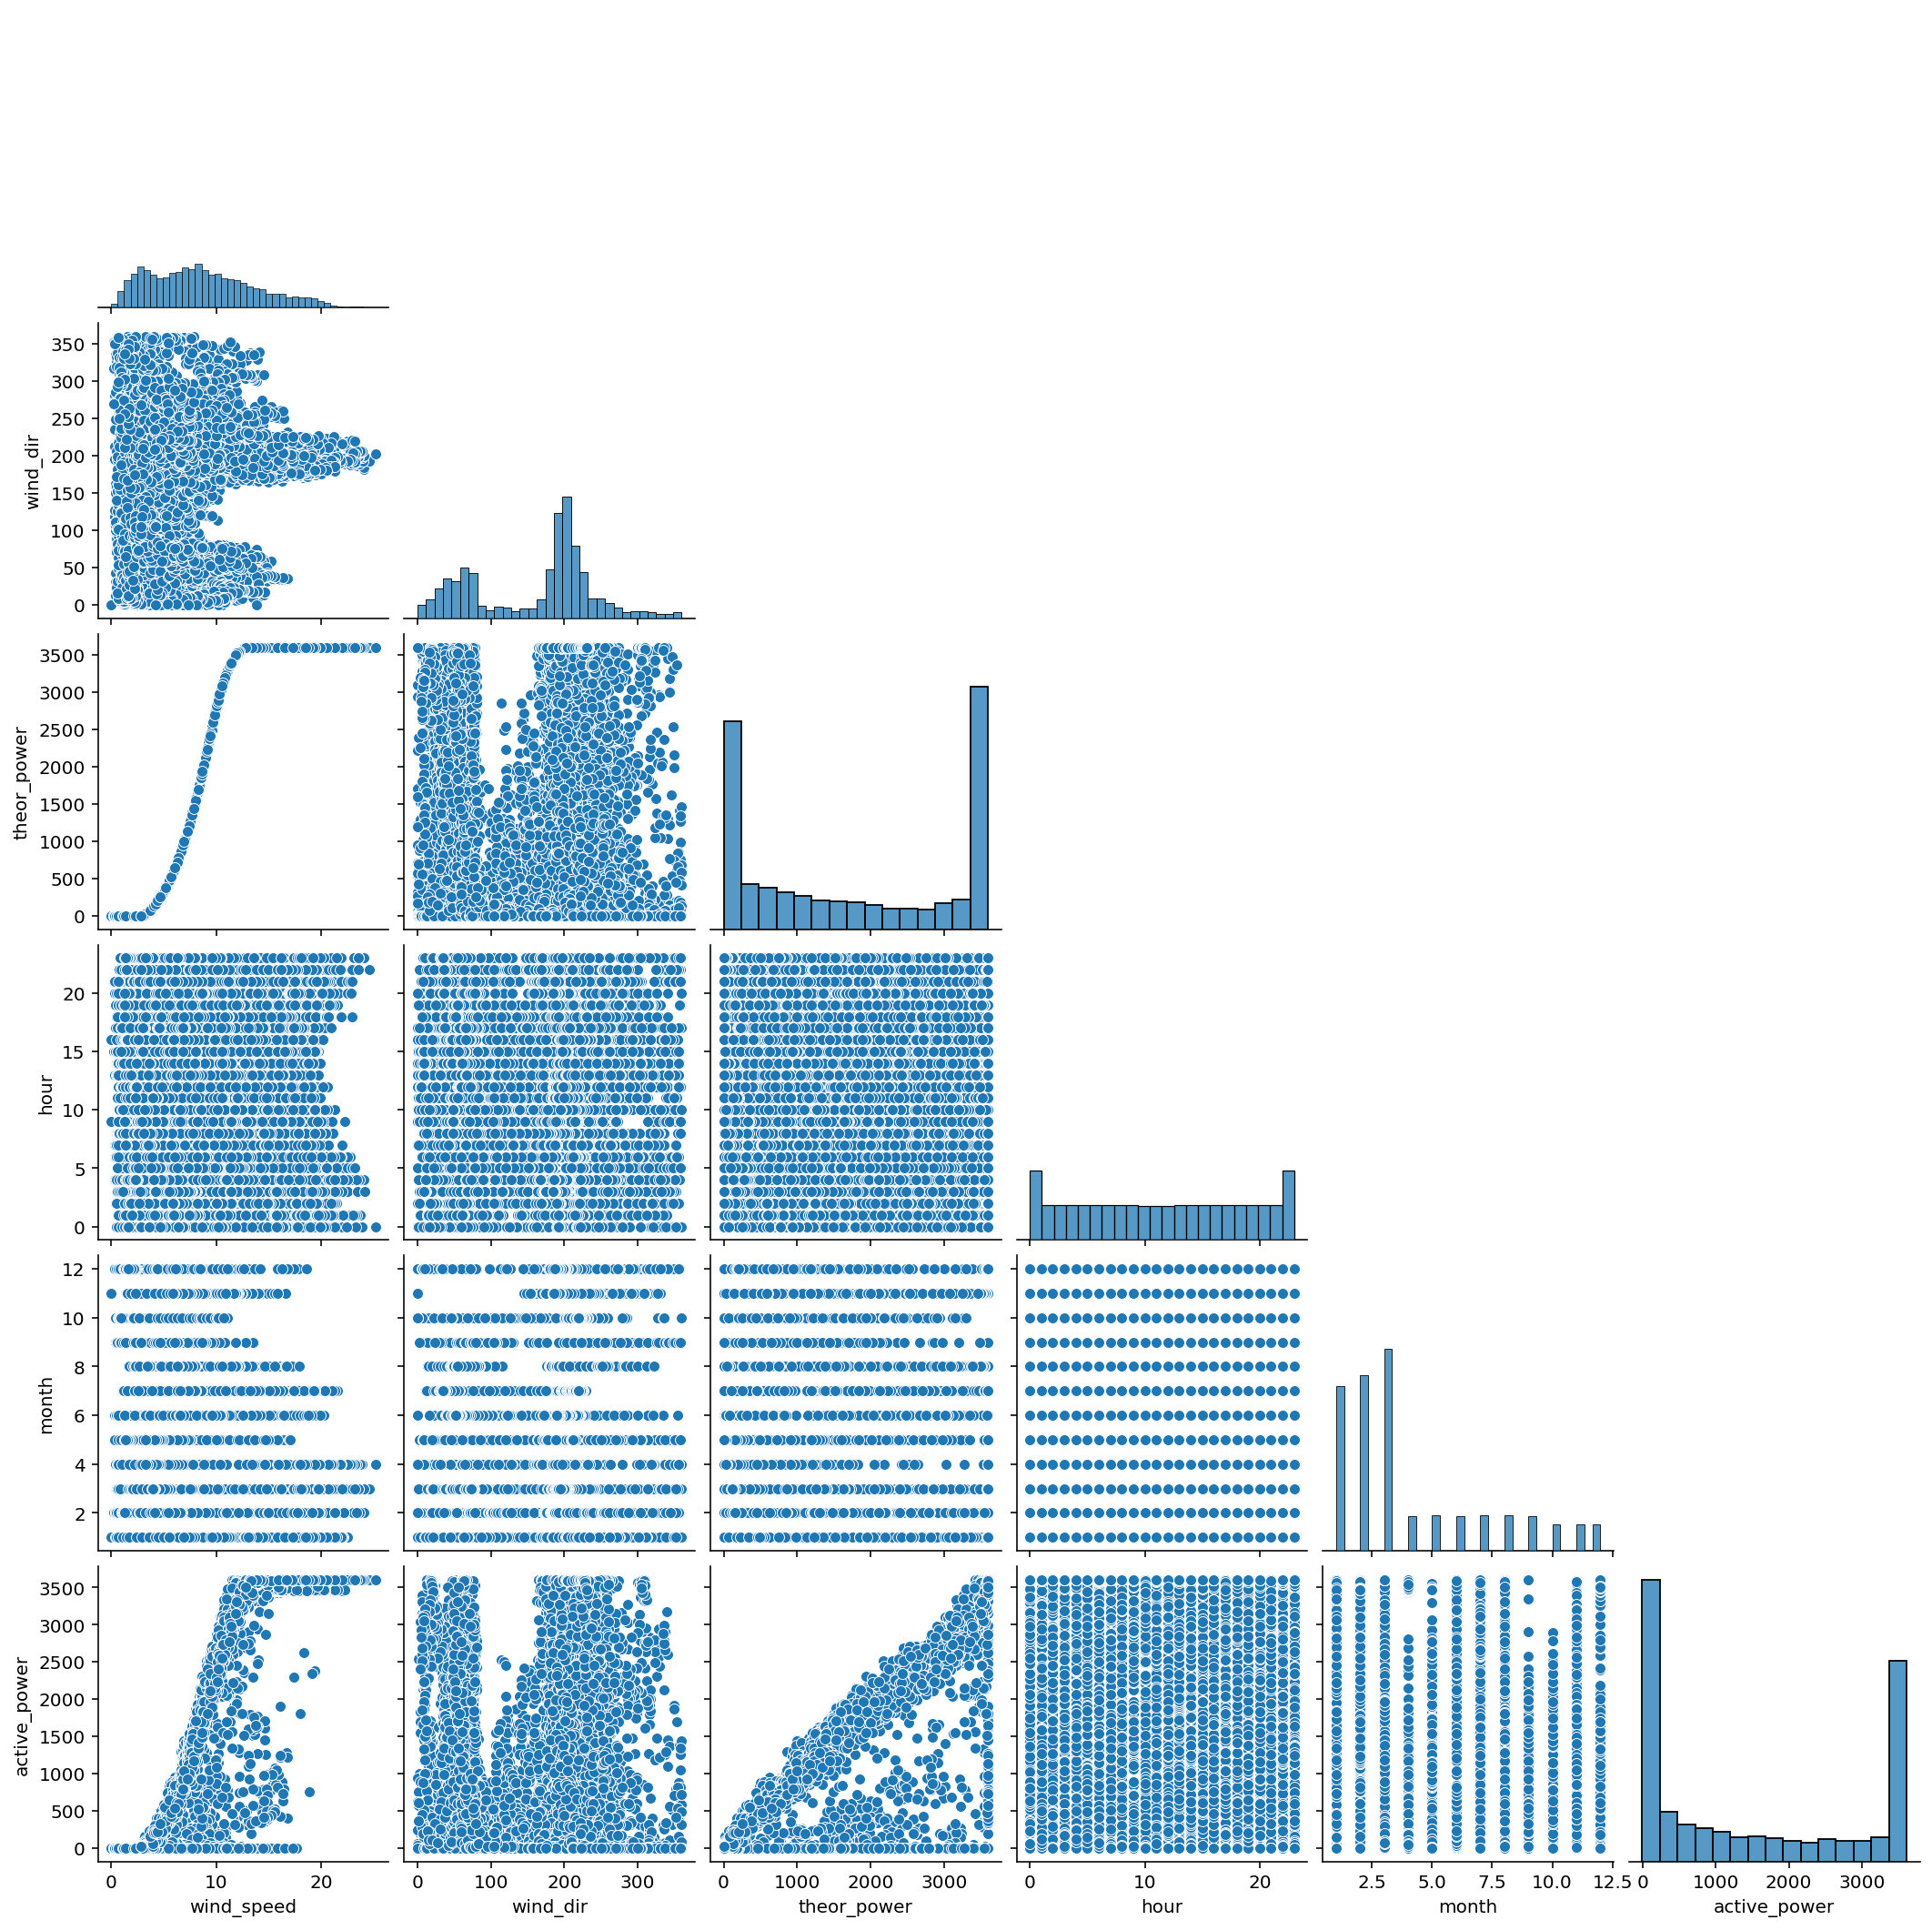

In [27]:
#EDA
sns.pairplot(df, vars=['wind_speed', 'wind_dir', 'theor_power', 'hour', 'month', 'active_power'], corner=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


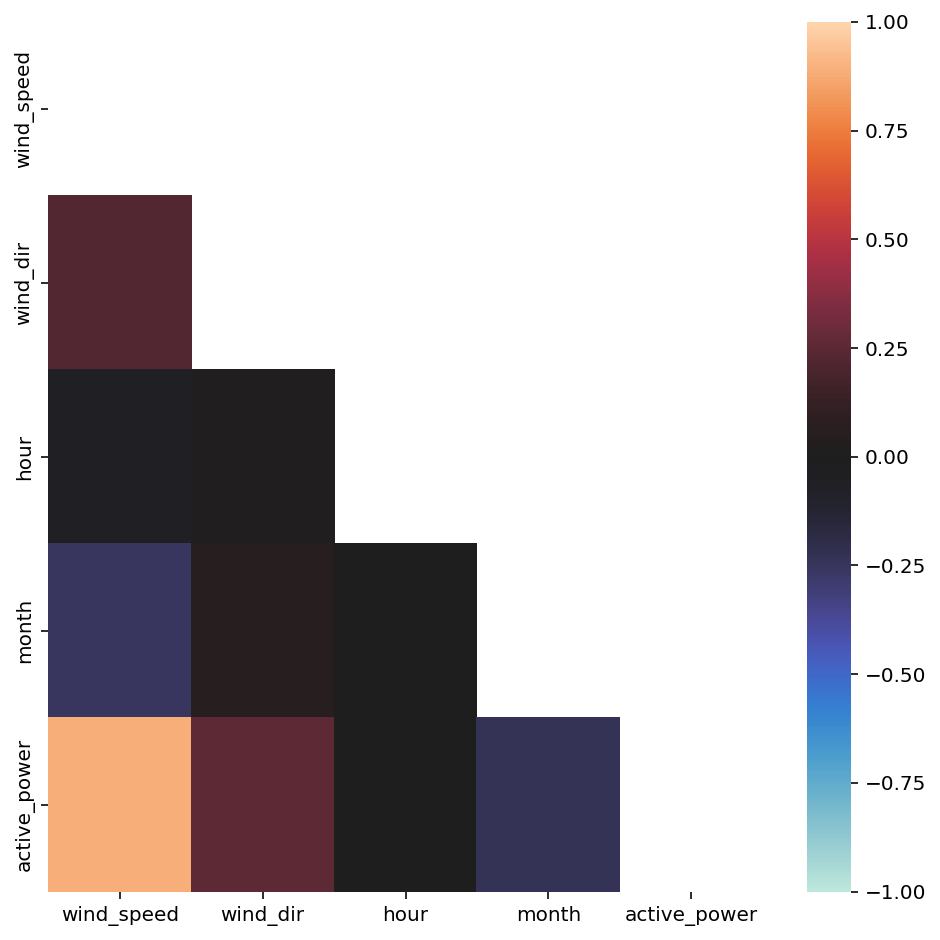

In [28]:
def corr_heatmap(df):    
    plt.figure(figsize=(8,8))

    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, cmap='icefire')

corr_heatmap(df_outlier_removed[['wind_speed', 'wind_dir', 'hour', 'month', 'active_power']])

In [29]:
#Power prediction
#Support Vector Machine
# Features and target: use only wind direction and wind speed
X = df_outlier_removed[['wind_dir', 'wind_speed']]
y = df_outlier_removed['active_power']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Make pipeline
pipe = make_pipeline(StandardScaler(), SVR())

# 5-fold CV
r2_cv = cross_val_score(pipe, X_train, y_train, cv=5)
print(r2_cv)
print(np.mean(r2_cv))

[0.72108455 0.73472373 0.72050339 0.72443105 0.74525443]
0.7291994326965745


In [30]:
# Fit SVM model
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

# Train R2
print(f'Train R2: {pipe.score(X_train, y_train)}')

# Test R2, MSE, MAE
print(f'Test R2: {pipe.score(X_test, y_test)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred)}')

Train R2: 0.7923576335938716
Test R2: 0.782734640816065
Test MAE: 472.03682797101686
Test MSE: 388142.83239339455


Text(0, 0.5, 'Predicted Active Power')

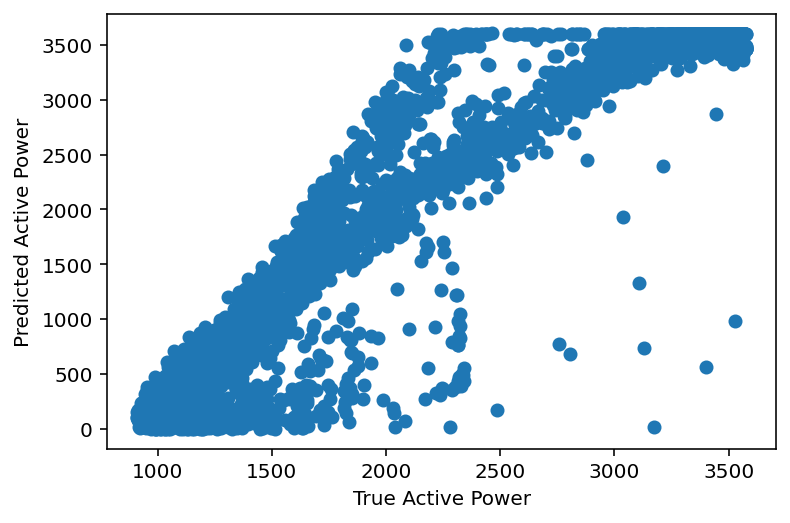

In [31]:
plt.scatter(y_pred, y_test)
plt.xlabel('True Active Power')
plt.ylabel('Predicted Active Power')

In [32]:
#Predict on time-series.

# Entire data
y_pred_all = pipe.predict(X)
# Predicted power into dataframe
y_pred = pd.DataFrame(y_pred_all, columns=['active_power'])
y_pred.index = y.index

y_pred

,active_power
date,
2018-01-01 00:00:00,1265.585178
2018-01-01 00:10:00,1353.925391
2018-01-01 00:20:00,1337.045285
2018-01-01 00:30:00,1368.453439
2018-01-01 00:40:00,1326.033730
...,...
2018-09-04 21:30:00,1165.994660
2018-09-04 21:40:00,1211.728168
2018-09-04 21:50:00,1092.769064


Text(0, 0.5, 'Active Power [kW]')

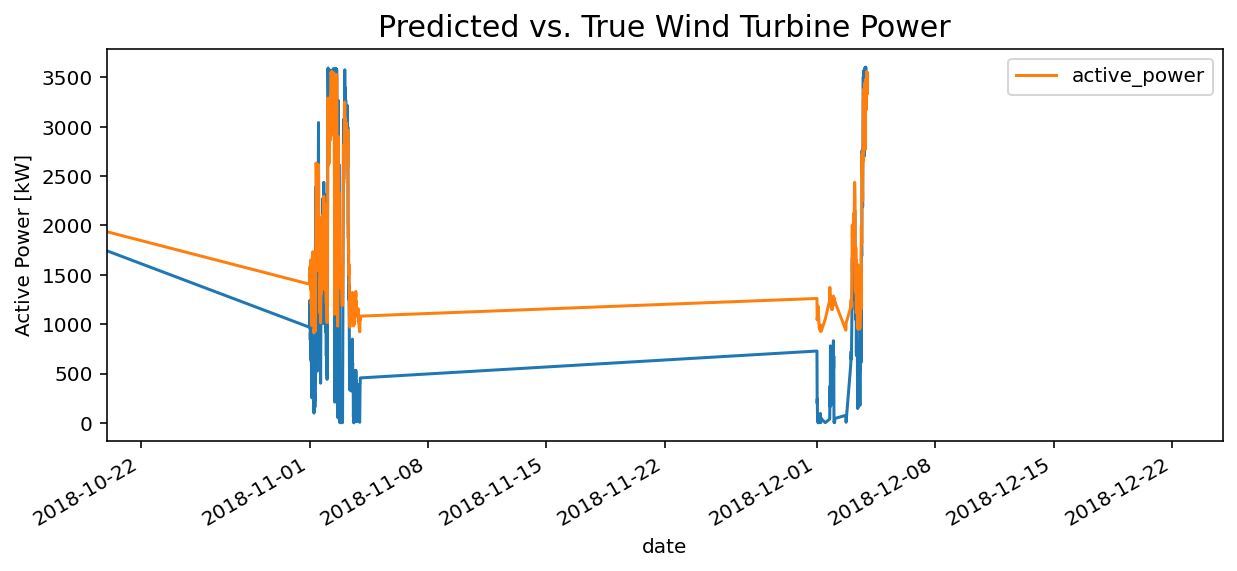

In [41]:
# True power (blue) vs. predicted power (orange)
t = df_outlier_removed.index
ax = y.plot(figsize=(10,4), xlim=(np.datetime64('2018-10-20'), np.datetime64('2018-12-25')))
y_pred.plot(figsize=(10,4), xlim=(np.datetime64('2018-10-20'), np.datetime64('2018-12-25')), ax=ax)
plt.title('Predicted vs. True Wind Turbine Power', size=15)
plt.ylabel('Active Power [kW]')

In [34]:
#non-linear function (our SVM hyperplane) of Active Power as a function of Wind Speed and Wind Direction
ws = np.linspace(0, 26, 50)
wd = np.linspace(0, 360, 50)
ws, wd = np.meshgrid(ws, wd)

# Prediction space dataframe
X_space = pd.DataFrame({'wind_dir': wd.flatten(), 'wind_speed': ws.flatten()})

y_pred_space = pipe.predict(X_space)
pipe.steps[1][1].get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Text(0.5, 0.92, 'SVM (C=1, Gamma=0.5)')

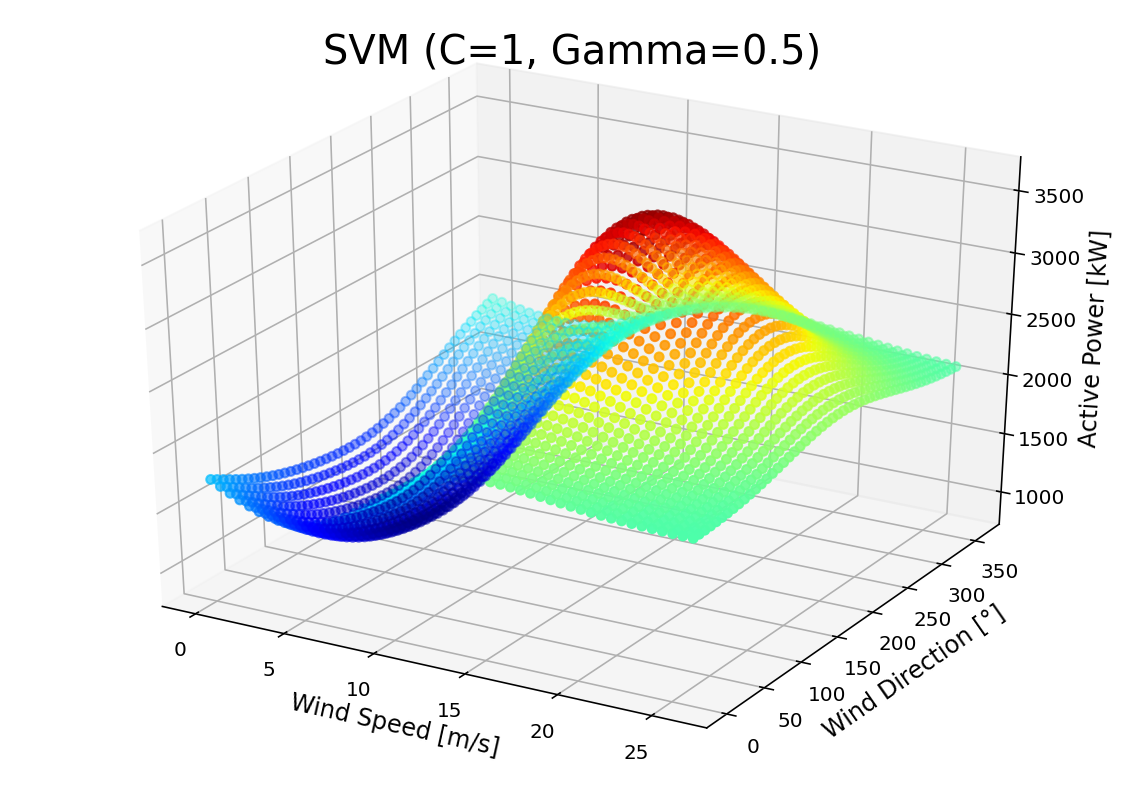

In [35]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X_space.wind_speed.values, X_space.wind_dir.values, y_pred_space, 
             c=y_pred_space, cmap='jet')

# ax.scatter3D(X.wind_speed.values, X.wind_dir.values, y, 
#              c='b', alpha=0.2)

ax.set_xlabel('Wind Speed [m/s]', size=12)
ax.set_ylabel('Wind Direction [°]', size=12)
ax.set_zlabel('Active Power [kW]', size=12)
ax.set_title('SVM (C=1, Gamma=0.5)', size=20)

In [36]:
#Tree models
# Features and target: now include hour and month as temporal features
X = df_outlier_removed[['wind_dir', 'wind_speed', 'hour', 'month']]
y = df_outlier_removed['active_power']

trees = [DTRegressor(), RFRegressor(), XGBRegressor(), Ada(), LGBMRegressor()]

for tree in trees:
    # Make pipeline
    pipe = make_pipeline(StandardScaler(), tree)
    
    # 10-fold CV
    r2_cv = cross_val_score(pipe, X_train, y_train, cv=10)
    print(f'{pipe.steps[1][1]}: {np.mean(r2_cv)}')

DecisionTreeRegressor(): 0.914980013829932
RandomForestRegressor(): 0.9500807119341529
[14:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:36] WARNING: /wor